(i) What is the joint distribution $P(y_1, y_2)$ of $y_1, y_2$? Write down its analytical form.

\begin{align*}
P(y_1, y_2) &= P(y_1) \cdot P(y_2) \\
&= \left(\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}}\right) \cdot \left(\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}\right) \\
&= \frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}} \\
&= \frac{1}{2\pi}e^{-\frac{(y_1)^2}{0.5}-\frac{(y_2-2)^2}{8}}.
\end{align*}

(ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.


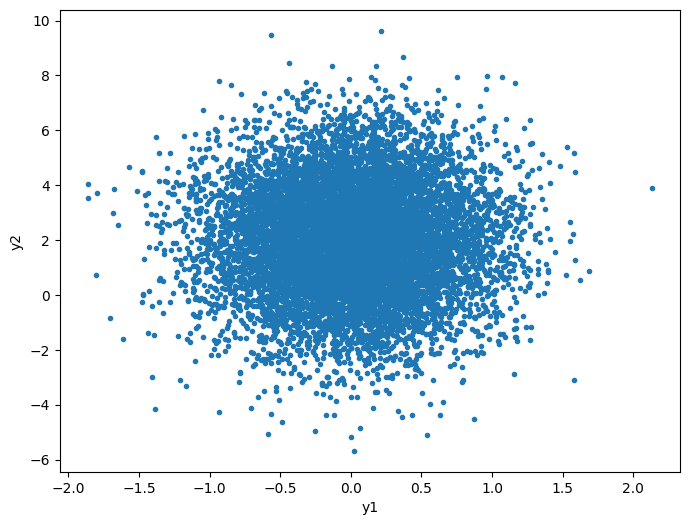

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 10000  # Number of samples
mu1 = 0
sigma1 = 0.5
mu2 = 2
sigma2 = 2

# Generate random samples for y1 and y2
samples_y1 = np.random.normal(mu1, sigma1, n)
samples_y2 = np.random.normal(mu2, sigma2, n)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples_y1, samples_y2, marker='.', alpha=1)
plt.xlabel('y1')
plt.ylabel('y2')
plt.show()

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

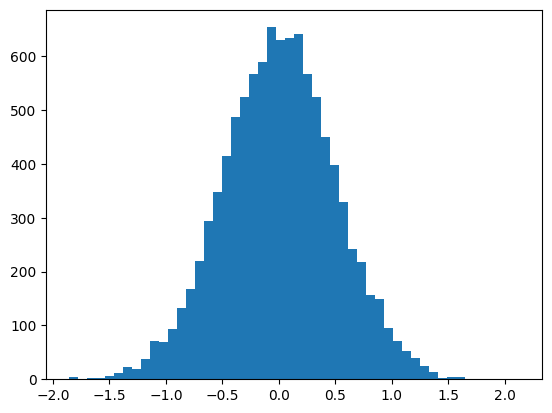

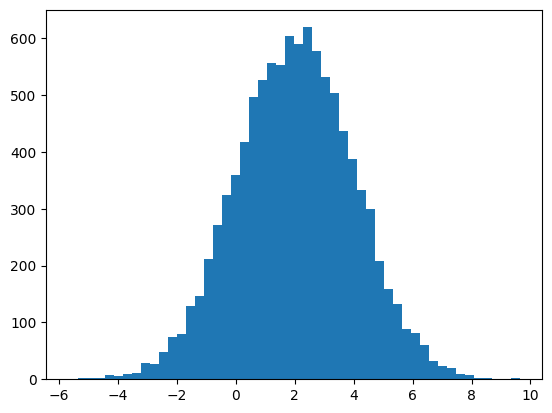

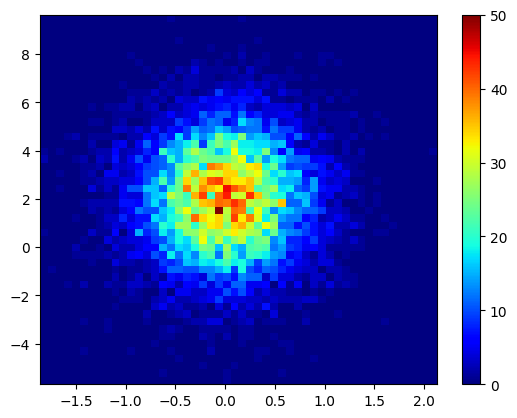

In [2]:
plt.hist(samples_y1,bins=50)
plt.show()
plt.hist(samples_y2,bins=50)
plt.show()
plt.hist2d(samples_y1, samples_y2, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.

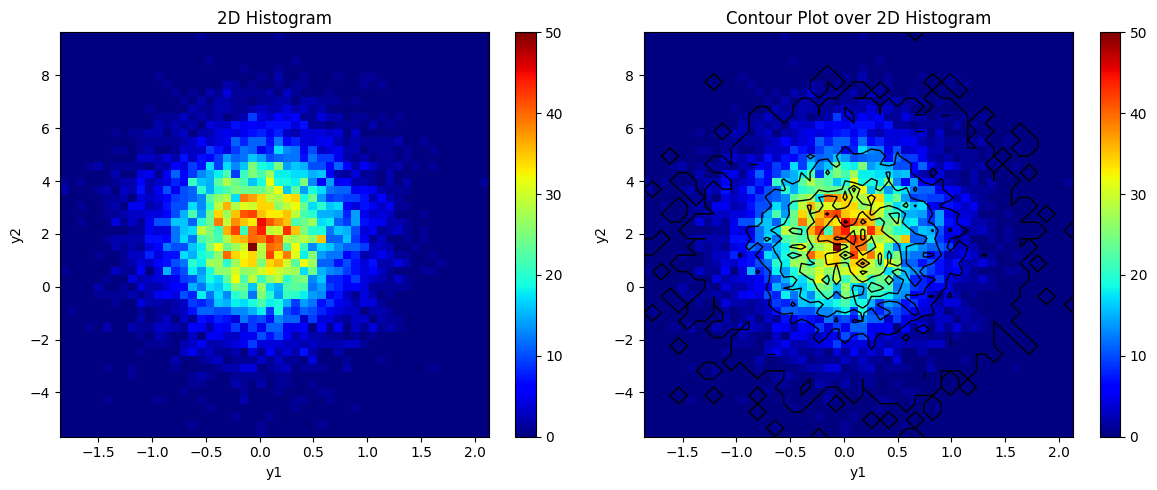

In [3]:

# Create 2D histogram with plt.hist2d
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist2d(samples_y1, samples_y2, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('2D Histogram')

# Create a contour plot over the 2D histogram
plt.subplot(1, 2, 2)
h = plt.hist2d(samples_y1, samples_y2, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.contour(h[0], extent=[h[1].min(), h[1].max(), h[2].min(), h[2].max()], colors='black', linewidths=1)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Contour Plot over 2D Histogram')

plt.tight_layout()
plt.show()

(v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 

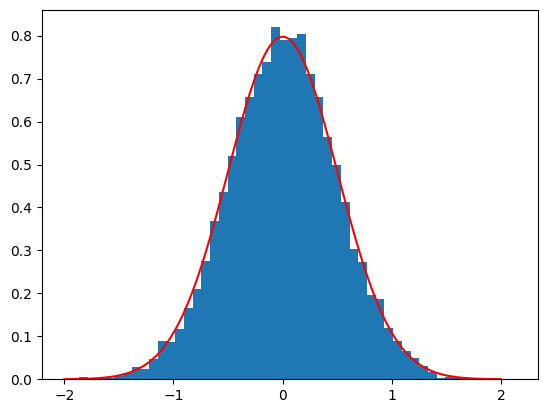

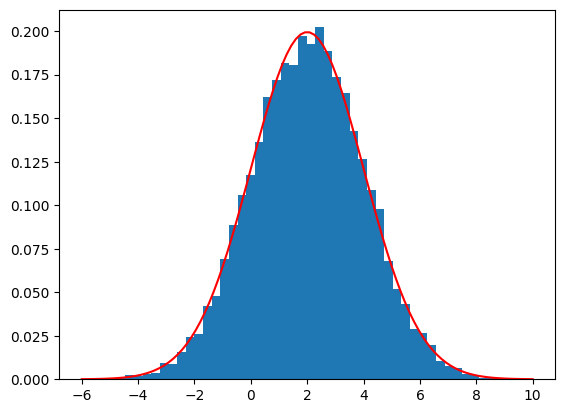

In [4]:
from scipy.stats import norm

plt.hist(samples_y1,bins=50,density=True)
x = np.linspace(-2,2,100)
plt.plot(x, norm.pdf(x, mu1, sigma1), 'r-')
plt.show()

plt.hist(samples_y2,bins=50,density=True)
x = np.linspace(-6,10,100)
plt.plot(x, norm.pdf(x, mu2, sigma2), 'r-')
plt.show()


vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems 1.1 to 1.5. What has changed compared to before? 


For doing this part we first redo the firts part wtih a new approach then we will generalize our answer

matrix $C$ for the first part is just $$C=\begin{pmatrix}
0.25 & 0  \\
0 & 4 
\end{pmatrix}.$$

and its inverse is  $$C^{-1}=\begin{pmatrix}
4 & 0  \\
0 & 0.25 
\end{pmatrix}.$$

We know that
$$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^n|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})}$$

In this case $$ (\boldsymbol{y}-\boldsymbol{\mu})  = \begin{pmatrix} y_1 \\ y_2 - 2 \end{pmatrix}$$ 

So we have 
$$ P(y_1,y_2) = \frac{1}{\sqrt{(2\pi)^2}}e^{-\frac{1}{2}\Big[ \begin{pmatrix}y_1 & y_2-2\end{pmatrix}\begin{pmatrix}
4 & 0  \\
0 & 0.25 
\end{pmatrix} \begin{pmatrix}y_1 \\ y_2-2\end{pmatrix}\Big]} $$

$$ = \dfrac{1}{2\pi} e^{-\frac{1}{2}(4y_1^2 + y^2_2/4 -y_2 +1)} $$

It's not surprising that we arrived at the same answer

For this part we first have to calculate new means ($\mu$):
$$ \begin{pmatrix} \mu_{z1} \\ \mu_{z2} \end{pmatrix} = A \begin{pmatrix} \mu_{y1} \\ \mu_{z2} \end{pmatrix} $$
$$ \Rightarrow \begin{pmatrix} \mu_{z1} \\ \mu_{z2} \end{pmatrix} = \begin{pmatrix} 0.4 \\ 2 \end{pmatrix} $$
Next step is calculating the $C_z$
$$ C_z = A C A^T = \begin{pmatrix} 0.17 &0.85 \\ 0.85 &4.01 \end{pmatrix} $$

Then we can find the joint distribution:
$$ P(z_1,z_2) = \frac{1}{\sqrt{(2\pi)^2} \times 0.0408}e^{-\frac{1}{2}\Big[ \begin{pmatrix}z_1 - 0.4 & z_2-2 \end{pmatrix}\begin{pmatrix}
-98.28 & 20.83  \\
20.83 & -4.17 
\end{pmatrix} \begin{pmatrix}z_1 - 0.4 \\ z_2 - 2\end{pmatrix}\Big]} $$

$$ = \frac{1}{(2\pi)\times 0.0408}e^{-\frac{1}{2} (- 98.28 z_{1}^{2} + 41.66 z_{1} z_{2} - 4.70 z_{1} - 4.17 z_{2}^{2} + 0.016 z_{2} + 0.92)} $$

In [5]:
import sympy as sp

z1, z2 = sp.symbols('z1 z2')

M1 = sp.Matrix([[z1 - 0.4], [z2 - 2]])
M2 = sp.Matrix([[-98.28, 20.83], [20.83, -4.17]])


result = M1.T * M2 * M1

final = sp.expand(result[0])
#print(sp.latex(final))

$- 98.28 z_{1}^{2} + 41.66 z_{1} z_{2} - 4.69599999999998 z_{1} - 4.17 z_{2}^{2} + 0.0160000000000018 z_{2} + 0.923199999999995$

## Problem 2: The Monty Hall problem (taken from MacKay)

Initially, there is a 1/3 chance the prize is behind Door 1, and a 2/3 chance it's behind one of the other two doors (Doors 2 and 3). When the host opens one of the other two doors (in this case, Door 3), it doesn't change the initial probabilities. The 2/3 probability that the prize is behind one of the unchosen doors (Doors 2 and 3) remains.

So, if the contestant switches to Door 2, they have a 2/3 chance of winning the prize. This is a counterintuitive result because it may seem that the initial 1/3 chance of the prize being behind Door 1 should remain even after the host opens a door. However, the crucial point is that the host's action of revealing a door without the prize effectively shifts the probabilities, favoring the other unchosen door.

In summary, the best strategy for the contestant is to switch to Door 2. This strategy will maximize their chances of winning the prize, resulting in a 2/3 probability of success.

Another, more mathematical approach is using Bayes theorem.

The probability that the prize is behind any of the three doors is:

$P($Prize at door i$)=P(i)=1/3$ where i=1,2,3

The contestant chooses door 1 and the host opens door 2 revealing no prize behind it.

Given that the prize is behind door 1 then the probability that the host would open door 2 is 1/2, either door 2 or 3 (both of them do not have the prize behind them and the host needs to open an empty door). So:

$P($Open door 2|Prize at door 1$)=P(open\_2|1)=\frac{1}{2}$

Given that the prize is behind door 2 then the probability that the host would open door 2 is 0, since he would never reveal the prize. So:

$P($Open door 2|Prize at door 2$)=P(open\_2|2)=0$

Given that the prize is behind door 3 then the probability that the host would open door 2 is 1, because he cannot reveal the prize nor can he open the contestant's selection, so the only one that can be opened is door 2:

$P($Open door 2|Prize at door 3$)=P(open\_2|3)=1$

Using Bayes theorem, we can calculate the probability that of the prize being behind each door, given that the host opened door 2. So:

$P($Prize at door 1|Open door 2$)=\frac{P(open\_2|1)P(1)}{\sum_{i=1}^{3}P(open\_2|i)P(i)}=\frac{1/2\cdot 1/3}
{1/2\cdot 1/3+0\cdot 1/3 + 1\cdot 1/3}=\frac{1}{3}$


$P($Prize at door 2|Open door 2$)=\frac{P(open\_2|2)P(2)}{\sum_{i=1}^{3}P(open\_2|i)P(i)}=\frac{0\cdot 1/3}
{1/2\cdot 1/3+0\cdot 1/3 + 1\cdot 1/3}=0$

$P($Prize at door 3|Open door 2$)=\frac{P(open\_2|3)P(3)}{\sum_{i=1}^{3}P(open\_2|i)P(i)}=\frac{1\cdot 1/3}
{1/2\cdot 1/3+0\cdot 1/3 + 1\cdot 1/3}=\frac{2}{3}$



by sticking with door 1 there is a 1 out of 3 chances of winning the prize and by switching to door 3 there are 2 out of 3 chances of winning, so to increase the probability of winning the contestant should switch doors.

Following is a simulation of the game being played n=100000 times:

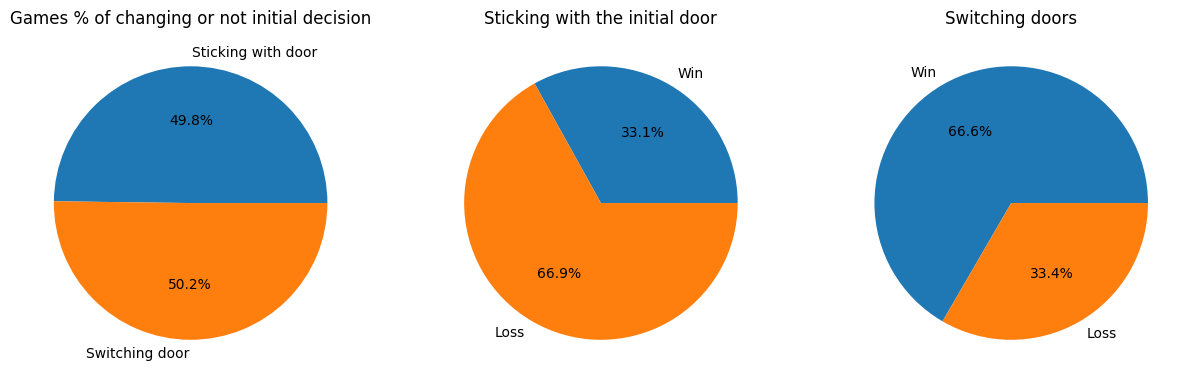

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#simulations
n=100000

#random number i to determine behind which door is the prize
i=np.random.randint(1,4,n)

#random number j to determine the contestant's door choice
j=np.random.randint(1,4,n)

#random number k to determine contestant's choice on staying k=0
#or switching doors k=1, both strategies at 50% of being followed
k=np.random.randint(0,2,n)

#counter for games/wins/losses where the contestant sticks with initial door
count0=0
win0=0
loss0=0

#counter for games/wins/losses where the contestant switches doors
count1=0
win1=0
loss1=0

a=0
while a<n:
    #the contestant decides to stick to their door and prize is behind it
    if k[a]==0 and j[a]==i[a]:
        count0+=1
        win0+=1
    #the contestant decides to stick to their door and prize is not behind it
    if k[a]==0 and j[a]!=i[a]:
        count0+=1
        loss0+=1
    #the contestant decides to switch their door and prize is behind the initial choice     
    if k[a]==1 and j[a]==i[a]:
        count1+=1
        loss1+=1
    #the contestant decides to switch their door and prize is not behind the initial choice
    if k[a]==1 and j[a]!=i[a]:
        count1+=1
        win1+=1
        
    a+=1

label0='Sticking with door','Switching door'
label1='Win','Loss'
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].pie([count0,count1],labels=label0,autopct='%1.1f%%')
axs[0].title.set_text('Games % of changing or not initial decision')
axs[1].pie([win0,loss0],labels=label1,autopct='%1.1f%%')
axs[1].title.set_text('Sticking with the initial door')
axs[2].pie([win1,loss1],labels=label1,autopct='%1.1f%%')
axs[2].title.set_text('Switching doors')
plt.show()

Looking at the pie charts for a large number of simulations, the results befit the probabilities that were calculated using Bayes Theorem.